In [7]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from datetime import datetime,timedelta
from netCDF4 import Dataset
import cmocean as cm

In [8]:
data=Dataset("./data.nc")

t=data.variables['MT2'][:].data
t=[int(i) for i in t]
ocm2=data.variables['OCM2'][:]
rtofs=data.variables['RTOFS'][:]


In [9]:
tt=[]
tt.append(int(datetime(int(2019),int(1),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(2),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(3),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(4),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(5),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(6),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(7),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(8),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(9),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(10),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(11),int(1)).strftime('%j')))
tt.append(int(datetime(int(2019),int(12),int(1)).strftime('%j')))


In [10]:
month_name=[]
month_name.append('Jan')
month_name.append('Feb')
month_name.append('Mar')
month_name.append('Apr')
month_name.append('May')
month_name.append('Jun')
month_name.append('Jul')
month_name.append('Aug')
month_name.append('Sep')
month_name.append('Oct')
month_name.append('Nov')
month_name.append('Dec')

lon=data['MX2'][:].data
lat=data['MY2'][:].data


In [11]:
def avg(array,t1,t2):
    avg=np.nanmean(array[t1:t2,:,:],axis=0)
    return avg.data

In [14]:

def surface(ocm2,mon,name):
    
    
    if(mon == 2):
        t1=t.index(tt[mon-1])
        t2=t.index(59)
    elif(mon == 3):
        t1=t.index(59)
        t2=t.index(tt[mon])
    else:
        t1=t.index(tt[mon-1])
        t2=t.index(tt[mon])

    fig = plt.figure()
    m=Basemap(projection='merc',llcrnrlat=18,urcrnrlat=30,\
            llcrnrlon=116,urcrnrlon=128) #resolution='h'

    fig.set_size_inches(10, 8, forward=True)
    ax = plt.gca()

    x,y=np.meshgrid(lon,lat)
    x,y=m(x,y)

    cs=m.contourf(x,y,avg(ocm2,t1,t2),np.linspace(-1,1,21),extend='both',cmap='seismic')
#color bar  pad is distance in colobar to pic
    cbar = m.colorbar(cs, location='right', pad="5%")
#set fontsize in color bar 
    cbar.ax.tick_params(labelsize=20)



    m.readshapefile('shape/ocm2','comarques',linewidth=1.5,drawbounds=True,color='k')    
    
#draw shape
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        patches.append(Polygon(np.array(shape), True) )
    ax.add_collection(PatchCollection(patches, facecolor= '#AAAAAA', edgecolor='k', linewidths=1., zorder=2))

        
####################       label   ################################################  
      
#make ylabel
    m.drawparallels(np.arange(18,31,2),labels=[1,0,0,0],fontsize=20, linewidth=0.0)
#make xlabel
    m.drawmeridians(np.arange(116,130,4),labels=[0,0,0,1],fontsize=20, linewidth=0.0)
#title
    plt.title(month_name[mon-1]+' SST diff '+name+' - GHRSST'  ,fontsize=15,weight='bold')  
        
    plt.xlabel('Longitude',fontsize=20, labelpad=35)
    plt.ylabel('Latitude',fontsize=20,  labelpad=55)
    
    fig.savefig(name+'_'+str(mon)+'.png')
          

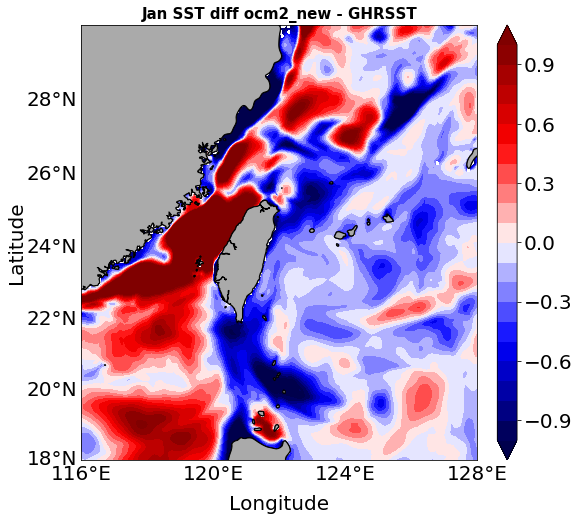

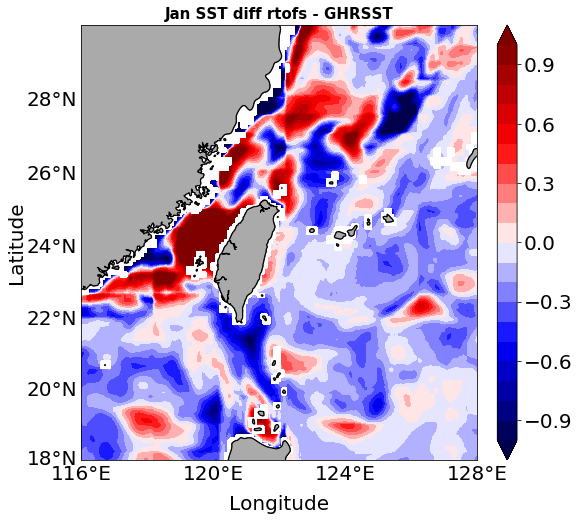

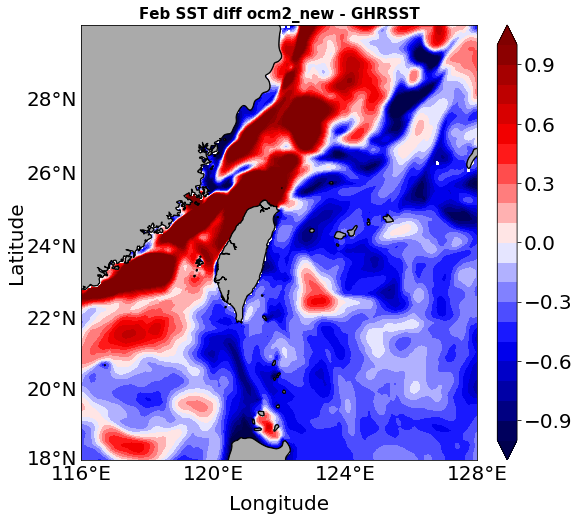

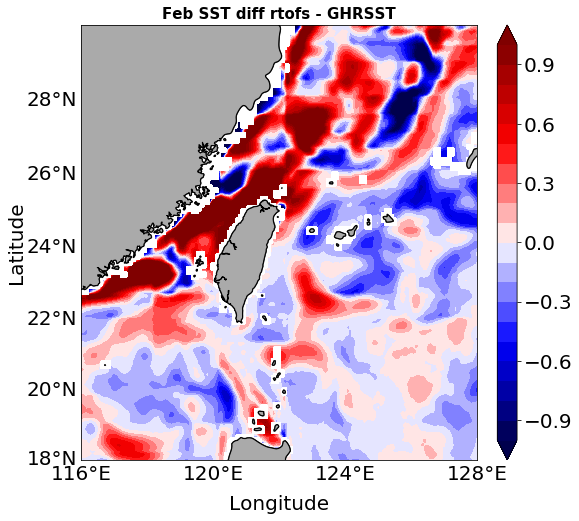

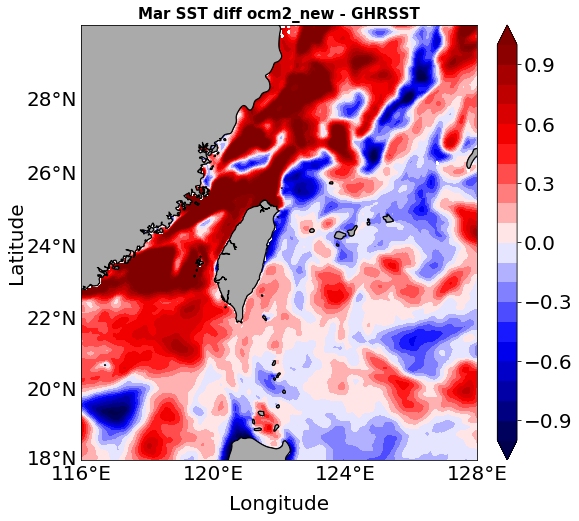

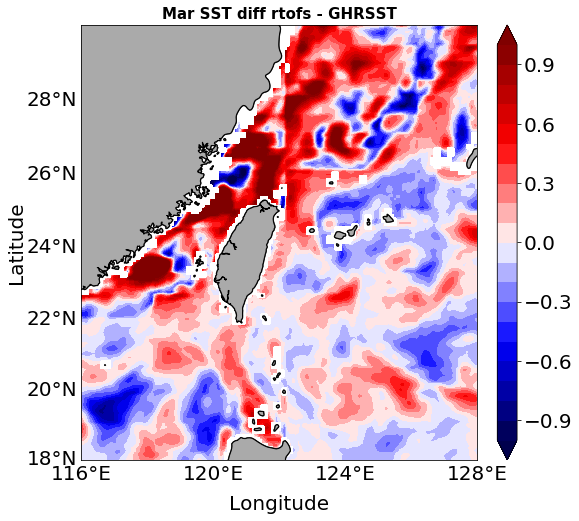

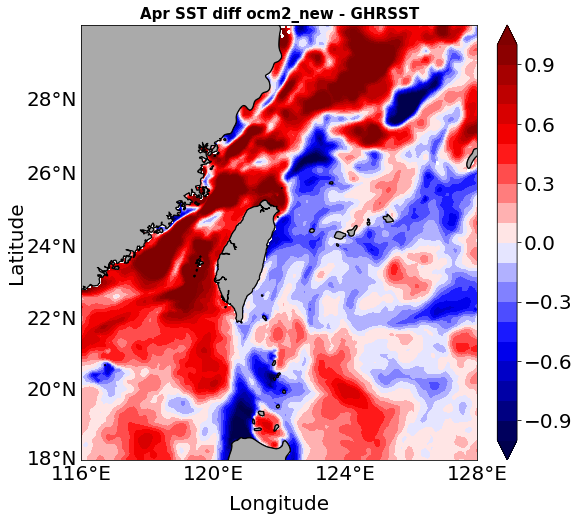

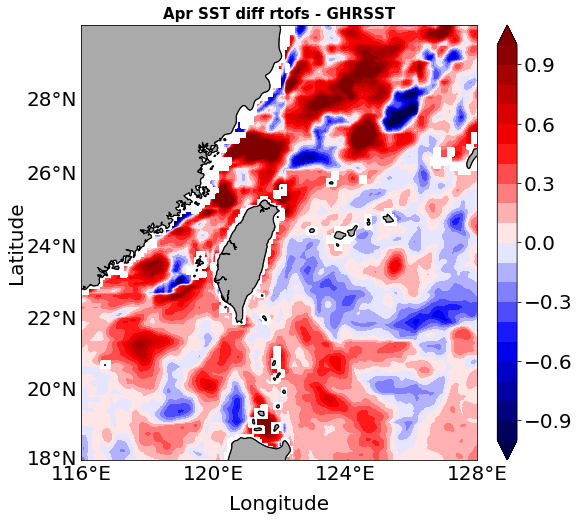

In [15]:
for i in range(1,5):                        
    surface(ocm2,i,'ocm2_new')
    surface(rtofs,i,'rtofs')